In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df_sekolah = pd.read_csv('jumlah-sekolah-sd-di-dki-jakarta-per-kecamatan.csv')
df_guru = pd.read_csv('jumlah-guru-sd-di-dki-jakarta-per-kecamatan.csv')

In [30]:
df_sekolah.head()

,kabkota,kecamatan,negeri,swasta
0,Jakarta Pusat,Tanah Abang,33,12
1,Jakarta Pusat,Menteng,17,13
2,Jakarta Pusat,Senen,39,12
3,Jakarta Pusat,Johar Baru,35,5
4,Jakarta Pusat,Cempaka Putih,25,9


In [31]:
df_guru.head()

,kabkota,kecamatan,negeri,swasta
0,Jakarta Pusat,Tanah Abang,419,142
1,Jakarta Pusat,Menteng,222,203
2,Jakarta Pusat,Senen,385,159
3,Jakarta Pusat,Johar Baru,384,60
4,Jakarta Pusat,Cempaka Putih,315,105


Text(0.5, 1.0, 'Rata-rata Jumlah Sekolah di DKI Jakarta')

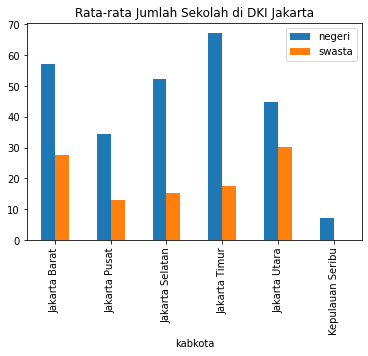

In [32]:
df_sekolah.groupby(['kabkota']).mean().plot(kind='bar');
plt.title ("Rata-rata Jumlah Sekolah di DKI Jakarta")

Text(0.5, 1.0, 'Rata-rata Jumlah Guru di DKI Jakarta')

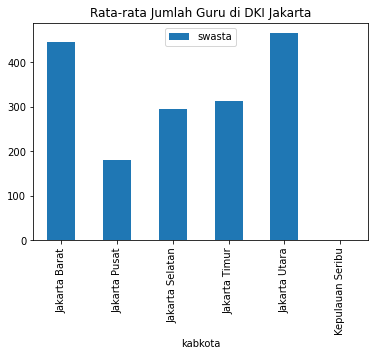

In [33]:
df_guru.groupby(['kabkota']).mean().plot(kind='bar');
plt.title ("Rata-rata Jumlah Guru di DKI Jakarta")

In [34]:
df_guru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   kabkota    44 non-null     object
 1   kecamatan  44 non-null     object
 2   negeri     44 non-null     object
 3   swasta     44 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ KB


In [35]:
df_guru.negeri = df_guru.negeri.apply(lambda x : x.replace(',',''))
df_guru.negeri = df_guru.negeri.astype('int64')

Text(0.5, 1.0, 'Rata-rata Jumlah Guru di DKI Jakarta')

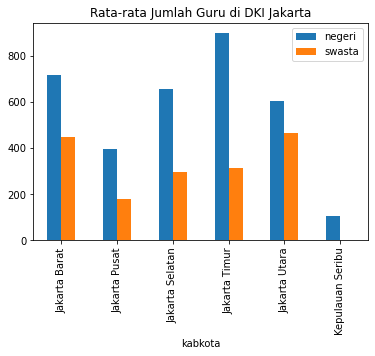

In [36]:
df_guru.groupby(['kabkota']).mean().plot(kind='bar');
plt.title ("Rata-rata Jumlah Guru di DKI Jakarta")

In [37]:
df_guru.kecamatan == df_sekolah.kecamatan

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
Name: kecamatan, dtype: bool

In [38]:
df_sekolah.values[22]

array(['Jakarta Selatan', 'Jagakarsa', 62, 21], dtype=object)

In [39]:
df_guru.values[22]

array(['Jakarta Selatan', ' Jagakarsa', 966, 343], dtype=object)

In [13]:
df_guru.columns = ['kabkota','kecamatan','guru_negeri','guru_swasta']
df_sekolah.columns = ['kabkota','kecamatan','sekolah_negeri','sekolah_swasta']

In [14]:
df_guru.head()

,kabkota,kecamatan,guru_negeri,guru_swasta
0,Jakarta Pusat,Tanah Abang,419,142
1,Jakarta Pusat,Menteng,222,203
2,Jakarta Pusat,Senen,385,159
3,Jakarta Pusat,Johar Baru,384,60
4,Jakarta Pusat,Cempaka Putih,315,105


In [15]:
df_guru['sekolah_negeri'] = df_sekolah['sekolah_negeri']
df_guru['sekolah_swasta'] = df_sekolah['sekolah_swasta']

In [16]:
df_guru.head()

,kabkota,kecamatan,guru_negeri,guru_swasta,sekolah_negeri,sekolah_swasta
0,Jakarta Pusat,Tanah Abang,419,142,33,12
1,Jakarta Pusat,Menteng,222,203,17,13
2,Jakarta Pusat,Senen,385,159,39,12
3,Jakarta Pusat,Johar Baru,384,60,35,5
4,Jakarta Pusat,Cempaka Putih,315,105,25,9


In [17]:
df_guru['rerata_guru_negeri'] = df_guru['guru_negeri']/df_guru['sekolah_negeri']
df_guru['rerata_guru_swasta'] = df_guru['guru_swasta']/df_guru['sekolah_swasta']

In [18]:
df_guru.head()

,kabkota,kecamatan,guru_negeri,guru_swasta,sekolah_negeri,sekolah_swasta,rerata_guru_negeri,rerata_guru_swasta
0,Jakarta Pusat,Tanah Abang,419,142,33,12,12.696970,11.833333
1,Jakarta Pusat,Menteng,222,203,17,13,13.058824,15.615385
2,Jakarta Pusat,Senen,385,159,39,12,9.871795,13.250000
3,Jakarta Pusat,Johar Baru,384,60,35,5,10.971429,12.000000
4,Jakarta Pusat,Cempaka Putih,315,105,25,9,12.600000,11.666667


In [19]:
df_guru.sort_values(by=['rerata_guru_negeri','rerata_guru_swasta'], ascending=False)

,kabkota,kecamatan,guru_negeri,guru_swasta,sekolah_negeri,sekolah_swasta,rerata_guru_negeri,rerata_guru_swasta
33,Jakarta Timur,Ciracas,914,223,55,10,16.618182,22.300000
25,Jakarta Selatan,Pesanggrahan,781,249,48,14,16.270833,17.785714
43,Kepulauan Seribu,Kepulauan Seribu Utara,113,0,7,0,16.142857,NaN
22,Jakarta Selatan,Jagakarsa,966,343,62,21,15.580645,16.333333
13,Jakarta Utara,Cilincing,875,436,60,38,14.583333,11.473684
39,Jakarta Timur,Cakung,1275,303,88,22,14.488636,13.772727
34,Jakarta Timur,Cipayung,793,227,55,13,14.418182,17.461538
35,Jakarta Timur,Makasar,686,273,48,19,14.291667,14.368421
14,Jakarta Barat,Kembangan,813,614,57,27,14.263158,22.740741
24,Jakarta Selatan,Cilandak,652,527,46,23,14.173913,22.913043
